<a href="https://colab.research.google.com/github/sahil-ansari-15/Bank-Customer-Churn-Prediction-using-ANN-Deep_Learning/blob/main/ANN_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Artificial Neural Network

### Data Preprocessing

In [1]:
# Importing the libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Importing the dataset

df_dataset = pd.read_csv('Churn_Modelling.csv')
X = df_dataset.iloc[:, 3:13]
y = df_dataset.iloc[:, 13]

In [3]:
df_dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
#Create dummy variables for One-hot encoding

geography = pd.get_dummies(X["Geography"],drop_first=True)
gender = pd.get_dummies(X['Gender'],drop_first=True)

In [6]:
df_dataset.Geography.value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [7]:
geography.head()

,Germany,Spain
0,0,0
1,0,1
2,0,0
3,0,0
4,0,1


In [8]:
# Concatenate the Data Frames

X = pd.concat([X,geography,gender],axis=1)

In [9]:
X.head(2)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,France,Female,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,0


In [10]:
# Drop Unnecessary columns

X = X.drop(['Geography','Gender'],axis=1)

In [11]:
# Splitting the dataset into the Training set and Test set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [12]:
# Feature Scaling

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Building ANN model

In [13]:
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout

In [14]:
# Initialising the ANN
classifier = Sequential()

In [15]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'he_uniform',activation='relu',input_dim = 11))

# units = output_dim
# kernel_initializer = init

In [16]:
# Adding the second hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'he_uniform',activation='relu'))

In [17]:
# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'glorot_uniform', activation = 'sigmoid'))

In [18]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6)                 72        
                                                                 
 dense_1 (Dense)             (None, 6)                 42        
                                                                 
 dense_2 (Dense)             (None, 1)                 7         
                                                                 
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


In [19]:
# Compiling the ANN
classifier.compile(optimizer = 'Adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [20]:
# Fitting the ANN to the Training set
model_history = classifier.fit(X_train, y_train,validation_split=0.33, batch_size = 50, epochs = 100)

Epoch 1/100
108/108 [==============================] - 1s 4ms/step - loss: 1.0978 - accuracy: 0.2952 - val_loss: 0.8540 - val_accuracy: 0.3768
Epoch 2/100
108/108 [==============================] - 0s 2ms/step - loss: 0.7374 - accuracy: 0.5443 - val_loss: 0.6539 - val_accuracy: 0.6740
Epoch 3/100
108/108 [==============================] - 0s 2ms/step - loss: 0.6010 - accuracy: 0.7397 - val_loss: 0.5629 - val_accuracy: 0.7713
Epoch 4/100
108/108 [==============================] - 0s 2ms/step - loss: 0.5377 - accuracy: 0.7899 - val_loss: 0.5214 - val_accuracy: 0.7936
Epoch 5/100
108/108 [==============================] - 0s 2ms/step - loss: 0.5048 - accuracy: 0.8033 - val_loss: 0.4970 - val_accuracy: 0.7993
Epoch 6/100
108/108 [==============================] - 0s 2ms/step - loss: 0.4834 - accuracy: 0.8069 - val_loss: 0.4807 - val_accuracy: 0.8027
Epoch 7/100
108/108 [==============================] - 0s 2ms/step - loss: 0.4682 - accuracy: 0.8080 - val_loss: 0.4693 - val_accuracy: 0.8023

In [21]:
# list all data in history

print(model_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


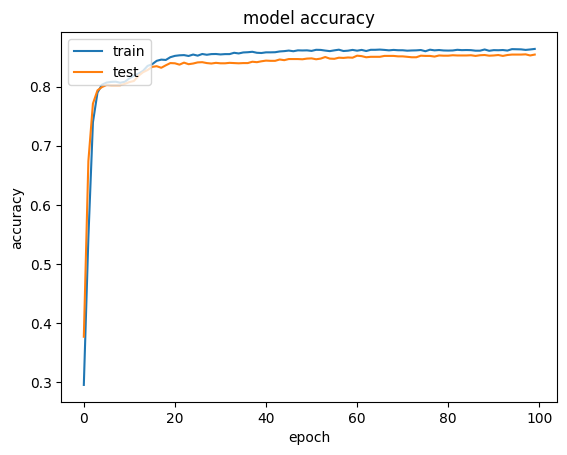

In [22]:
# summarize history for accuracy

plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

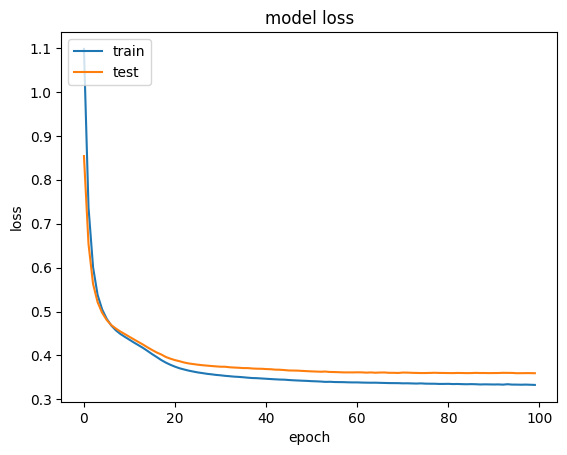

In [23]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Making the predictions and evaluating the model

In [24]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred[:5]

63/63 [==============================] - 0s 1ms/step


array([[0.3858518 ],
       [0.3207456 ],
       [0.19801748],
       [0.06980166],
       [0.0486078 ]], dtype=float32)

In [25]:
y_pred_transformed = np.where(y_pred > 0.5, 1, 0)
y_pred_transformed[:5]

array([[0],
       [0],
       [0],
       [0],
       [0]])

In [26]:
y_test[:5]

9394    0
898     1
2398    0
5906    0
2343    0
Name: Exited, dtype: int64

In [27]:
type(y_test)

pandas.core.series.Series

In [28]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_transformed)
cm

array([[1513,   82],
       [ 202,  203]])

In [29]:
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred_transformed,y_test)
score

0.858